In [402]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D

In [403]:
# Fetching data
data = pd.read_csv('Housing Price data set.csv')
data=data.drop(['Unnamed: 0','driveway','recroom','fullbase','airco','prefarea', 'gashw'],axis=1)
# di = {'no': 0, 'yes': 1}
# data=data.replace({'driveway':di,'recroom':di,'fullbase':di,'gashw':di,'airco':di,'prefarea':di})
mean = data.mean()[0]
stddev = data.std()[0]
data = (data - data.mean())/data.std()
data.head()

,price,lotsize,bedrooms,bathrms,stories,garagepl
0,-0.978239,0.322732,0.047192,-0.568973,0.221501,0.357239
1,-1.109312,-0.530526,-1.308947,-0.568973,-0.930304,-0.803788
2,-0.697368,-0.964074,0.047192,-0.568973,-0.930304,-0.803788
3,-0.285425,0.691709,0.047192,-0.568973,0.221501,-0.803788
4,-0.266700,0.557955,-1.308947,-0.568973,-0.930304,-0.803788


In [404]:
# Separate out the Feature and Target matrices
data=np.asarray(data)
Y=data[:,0:1]
X=data[:,1:]
one = np.ones((len(X),1))
X = np.concatenate((one,X),axis=1)
print(X.shape, Y.shape)

(546, 6) (546, 1)


In [405]:
def denormalise_price(price):
    global mean
    global stddev
    ret = price * stddev + mean
    return ret

def computeError(predicted, actual):
    error = 0
    for i in range(len(predicted)):
        error += abs(actual[i] - predicted[i]) / actual[i]
    error = error / len(actual)
    return error[0]*100

In [406]:
# Locally Weighted Regression with normal Equation

def normalEquationLWR(X,Y, index, Tao):
    Tfunc = np.exp(np.sum((X-X[index])**2, axis=1) / (-2*Tao**2))
    W = Tfunc * np.identity(X.shape[0])
    theta = np.linalg.inv(X.T@W@X)@X.T@W@Y
    return theta

Text(0.5, 1.0, 'Effect of Tao on error')

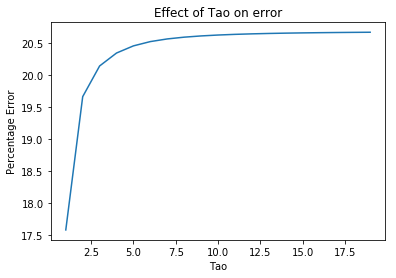

In [407]:
# Normal Equation


#Trainging every time for each sample
tmp=[]
err =[]
for j in range (1,20):
    tmp.append(j)
    error =0
    Y_pred = []
    for i in range(len(X)):
        theta = normalEquationLWR(X,Y,i, j)
        predicted = denormalise_price(X[i]@(theta))
        actual = denormalise_price(Y[i])
        Y_pred.append(predicted)
        error += abs(predicted  - actual) / actual
    err.append(error/ len(X)*100)
    
f,a = plt.subplots()
a.plot(tmp,err)
a.set_xlabel('Tao')
a.set_ylabel('Percentage Error')  
a.set_title('Effect of Tao on error') 
# print("Percentage Error :", computeError(Y_pred,denormalise_price(Y)))


Text(0.5, 1.0, 'Predicted and Actual prices(LWR)')

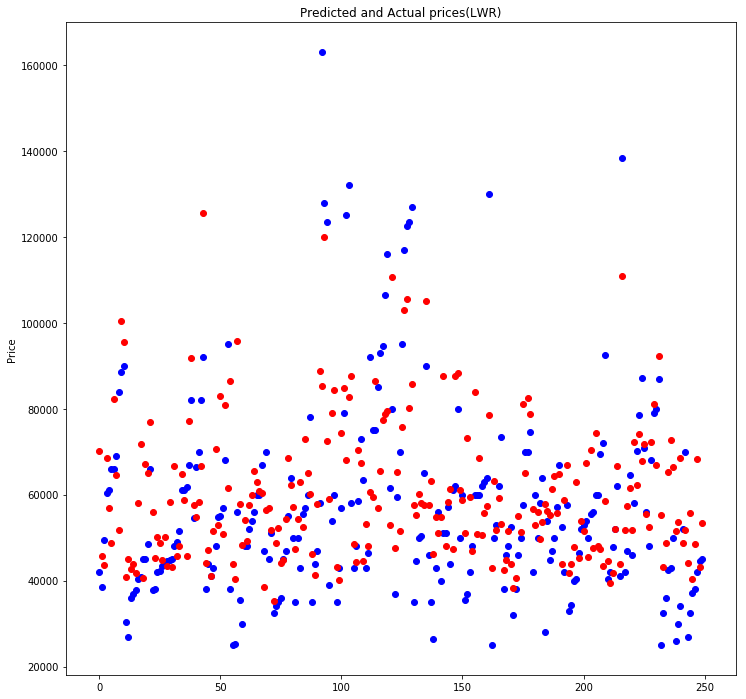

In [408]:
# Percenatge error vs Lmbda plot
fig, ax = plt.subplots()  
fig.set_size_inches(12,12)
lent = 250
ax.scatter(np.arange(lent), denormalise_price(Y[:lent]), color = 'b')
ax.scatter(np.arange(lent), Y_pred[:lent], color = 'r')
ax.set_ylabel('Price')  
ax.set_title('Predicted and Actual prices(LWR)') 